<h1 align="center">CAS Modeling</h1>

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split

from lime import lime_tabular

import warnings
warnings.filterwarnings("ignore")

sns.set_theme()

In [2]:
pd.set_option('display.max_columns',None)

## Importing data

In [4]:
df= pd.read_csv('CAS_modified .csv')
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.head()

,X,Y,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,houseOrBuilding,kerb,light,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA
0,1772561.0,5896382.0,0.0,0.0,0.0,1.0,0.0,None,2007/2008,EAST ST,ELLIOT ST,Non-Injury Crash,No,2007,0.0,North,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Dark,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,On,1.0,0.0,Auckland,Traffic Signals,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine
1,1836757.0,5859311.0,0.0,0.0,0.0,2.0,0.0,None,2002/2003,SH 2,SH 26,Non-Injury Crash,Yes,2003,0.0,North,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Dark,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Waikato Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,On,0.0,0.0,Hauraki District,Give way,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine
2,1762088.0,5912507.0,0.0,0.0,0.0,1.0,0.0,West,2009/2010,CHURCH ST,HUGO JOHNSTON DRIVE,Non-Injury Crash,No,2010,0.0,East,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Bright sun,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,Off,0.0,0.0,Auckland,Traffic Signals,0.0,0.0,0.0,0.0,0.0,0.0,Urban,1.0,0.0,0.0,Fine
3,1753522.0,5911939.0,0.0,0.0,0.0,2.0,0.0,None,2017/2018,THE AVENUE,ACCESSWAY,Minor Crash,No,2017,0.0,North,0.0,0.0,0.0,Hill Road,0.0,0.0,0.0,Overcast,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,None,0.0,0.0,Auckland,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Light rain
4,1761364.0,5914259.0,0.0,0.0,0.0,2.0,0.0,None,2017/2018,PENROSE INT,GT SOUTH LINK,Non-Injury Crash,No,2018,0.0,North,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Overcast,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Auckland Region,Motorway ramp,1-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,None,0.0,0.0,Auckland,Give way,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine


In [5]:
df.minorInjuryCount.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  7.,  6.,  8., 16.,  9., 18., 10.,
       30., 13., 26., 12., 11., 34., 15., 14., 21.])

In [6]:
df.shape

(775991, 61)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775991 entries, 0 to 775990
Data columns (total 61 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          775991 non-null  float64
 1   Y                          775991 non-null  float64
 2   bicycle                    775991 non-null  float64
 3   bridge                     775991 non-null  float64
 4   bus                        775991 non-null  float64
 5   carStationWagon            775991 non-null  float64
 6   cliffBank                  775991 non-null  float64
 7   crashDirectionDescription  775991 non-null  object 
 8   crashFinancialYear         775991 non-null  object 
 9   crashLocation1             775991 non-null  object 
 10  crashLocation2             775991 non-null  object 
 11  crashSeverity              775991 non-null  object 
 12  crashSHDescription         775990 non-null  object 
 13  crashYear                  77

In [8]:
df.minorInjuryCount.value_counts()

0.0     582954
1.0     154825
2.0      28572
3.0       6590
4.0       2068
5.0        622
6.0        222
7.0         81
8.0         23
9.0         13
10.0         7
11.0         2
18.0         2
16.0         2
30.0         1
13.0         1
26.0         1
12.0         1
34.0         1
15.0         1
14.0         1
21.0         1
Name: minorInjuryCount, dtype: int64

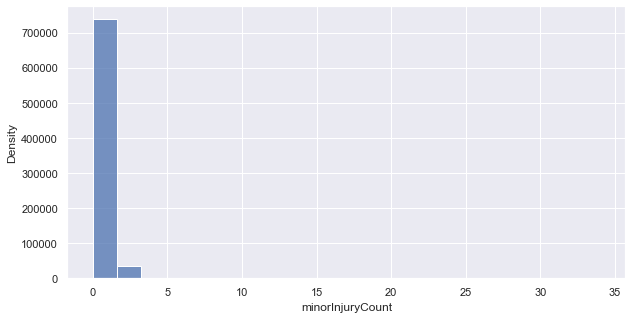

In [9]:
plt.figure(figsize=(10,5))
plt.xlabel('minorInjuryCount')
plt.ylabel('Density')
sns.histplot(df['minorInjuryCount'])
plt.show()

In [10]:
df['mcount'] = df.apply(
    lambda row: 5 if row['minorInjuryCount'] >=3 else row['minorInjuryCount'] ,
    axis=1
)

In [11]:
df.mcount.value_counts()

0.0    582954
1.0    154825
2.0     28572
5.0      9640
Name: mcount, dtype: int64

In [12]:
df.shape

(775991, 62)

In [13]:
null_columns = df.columns[df.isnull().any()]
(df[null_columns].isnull().sum()/len(df))*100

crashSHDescription    0.000129
dtype: float64

## Modeling

In [16]:
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label.squeeze(1), 'Predicted': predictions})
    df_results['PredictedT'] = np.round(df_results['Predicted'])
    df_results['Residuals'] = (df_results['Actual'] - df_results['Predicted'])
        
    return df_results

In [18]:
def normal_errors_assumption(model, features, label):
    df_results = calculate_residuals(model, features, label) 
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()

In [19]:
def Feature_imp(Model,n,X,y):
    model = Model
    # create the RFE model and select attributes
    rfe = RFE(model,n_features_to_select= n)
    rfe = rfe.fit(X, y)
    # summarize the selection of the attributes
    return pd.DataFrame({'Decision':rfe.support_,'Ranking':rfe.ranking_,'Feature':X.columns})

### Possion distribution to find significant alpha

In [20]:
df.minorInjuryCount.mean()

0.31655779512906723

In [21]:
df.minorInjuryCount.var()

0.41211206826943525

In [22]:
formula = "mcount ~ bicycle+bridge+bus+carStationWagon+cliffBank+debris+ditch+fence+flatHill+guardRail+houseOrBuilding+kerb+moped+motorcycle+NumberOfLanes+objectThrownOrDropped+otherObject+otherVehicleType+overBank+parkedVehicle+phoneBoxEtc+postOrPole+roadworks+schoolBus+slipOrFlood+speedLimit+strayAnimal+streetLight+suv+taxi+trafficIsland+trafficSign+train+tree+truck+unknownVehicleType+urban+vanOrUtility+vehicle+waterRiver"
y, X = dmatrices(formula, df, return_type='dataframe')
X.drop("Intercept",axis=1,inplace=True)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)

In [24]:
Feature = Feature_imp(PoissonRegressor(),11,X_train,y_train)

In [25]:
Feature[Feature.Decision==True]

,Decision,Ranking,Feature
0,True,1,flatHill[T.Hill Road]
5,True,1,bicycle
8,True,1,carStationWagon
9,True,1,cliffBank
17,True,1,motorcycle
18,True,1,NumberOfLanes
23,True,1,parkedVehicle
29,True,1,speedLimit
31,True,1,suv
36,True,1,tree


In [26]:
X_train_poi = X[['flatHill[T.Hill Road]','bicycle','carStationWagon','motorcycle','NumberOfLanes','parkedVehicle','speedLimit','suv','tree','truck']]
y_train_poi = y

In [27]:
model_poi = sm.GLM(y_train_poi, X_train_poi,family=sm.families.Poisson()).fit()

In [28]:
model_poi.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
=======================================================================
Model:                 GLM               AIC:             1226105.0246 
Link Function:         log               BIC:             -9715570.5750
Dependent Variable:    mcount            Log-Likelihood:  -6.1304e+05  
Date:                  2022-04-10 11:47  LL-Null:         -6.1044e+05  
No. Observations:      775991            Deviance:        8.0820e+05   
Df Model:              9                 Pearson chi2:    1.37e+06     
Df Residuals:          775981            Scale:           1.0000       
Method:                IRLS                                            
-----------------------------------------------------------------------
                       Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
flatHill[T.Hill Road]  0.0380   0.0047    8.0057 0.0000  0.0287  0.0473
bicycle                0.4476   0.0081   55.4989 0.0000  0.4318  0.4634
carStationWagon       -0.1938   0.0026  -74.1142 0.0000 -0.1989 -0.1886
motorcycle             0.2070   0.0082   25.1720 0.0000  0.1909  0.2231
NumberOfLanes         -0.2508   0.0021 -117.9463 0.0000 -0.2549 -0.2466
parkedVehicle         -0.7227   0.0085  -84.5776 0.0000 -0.7394 -0.7059
speedLimit            -0.0027   0.0001  -42.8394 0.0000 -0.0029 -0.0026
suv                   -0.0307   0.0059   -5.2234 0.0000 -0.0422 -0.0192
tree                   0.1182   0.0086   13.7935 0.0000  0.1014  0.1350
truck                 -0.2970   0.0077  -38.3738 0.0000 -0.3122 -0.2819
=======================================================================

"""

In [29]:
model_poi.pearson_chi2/model_poi.df_resid

1.7595159799074285

In [30]:
model_poi.mu

array([0.42216056, 0.35864201, 0.43531823, ..., 0.31292368, 0.34255312,
       0.21718831])

In [31]:
X_train_poi['Count'] = y_train_poi

In [32]:
X_train_poi['Lambda'] = model_poi.mu

In [33]:
X_train_poi['AUX_OLS_DEP'] = X_train_poi.apply(lambda x: ((x['Count'] - x['Lambda'])**2 - x['Lambda']) / x['Lambda'], axis=1)

In [34]:
X_train_poi.head()

,flatHill[T.Hill Road],bicycle,carStationWagon,motorcycle,NumberOfLanes,parkedVehicle,speedLimit,suv,tree,truck,Count,Lambda,AUX_OLS_DEP
0,0.0,0.0,1.0,0.0,2.0,0.0,50.0,1.0,0.0,0.0,0.0,0.422161,-0.577839
1,0.0,0.0,2.0,0.0,2.0,0.0,50.0,0.0,0.0,0.0,0.0,0.358642,-0.641358
2,0.0,0.0,1.0,0.0,2.0,0.0,50.0,0.0,0.0,0.0,0.0,0.435318,-0.564682
3,1.0,0.0,2.0,0.0,2.0,0.0,50.0,0.0,0.0,0.0,1.0,0.372525,0.056908
4,0.0,0.0,2.0,0.0,2.0,0.0,50.0,0.0,0.0,0.0,0.0,0.358642,-0.641358


In [35]:
aux_olsr_results = sm.OLS(X_train_poi['Lambda'], X_train_poi['AUX_OLS_DEP']).fit()

In [36]:
print(aux_olsr_results.params)

AUX_OLS_DEP    0.001898
dtype: float64


In [37]:
aux_olsr_results.tvalues #1.644855 t-value

AUX_OLS_DEP    43.274433
dtype: float64